In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_test[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

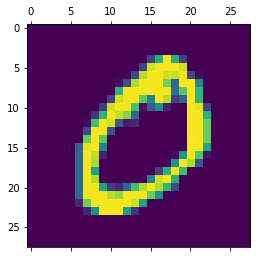

In [8]:
plt.matshow(X_train[1])

In [9]:
y_train[2]

4

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
#now we will flatten our data

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
X_train_flattened.shape

(60000, 784)

In [17]:
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_test_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
X_test_flattened.shape

(10000, 784)

In [19]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
model = keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 595us/step - loss: 0.4694 - accuracy: 0.8772
Epoch 2/5
1875/1875 [==============================] - 1s 650us/step - loss: 0.3036 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 1s 698us/step - loss: 0.2833 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 1s 649us/step - loss: 0.2732 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 1s 701us/step - loss: 0.2668 - accuracy: 0.9264


In [21]:
#if accuracy is low then we need to scale the value now how to scale them!
#each individual value is from 0 to 255 so if we divide it by 255 then we scale each value

In [22]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 552us/step - loss: 0.2664 - accuracy: 0.9267


[0.2664487361907959, 0.9266999959945679]

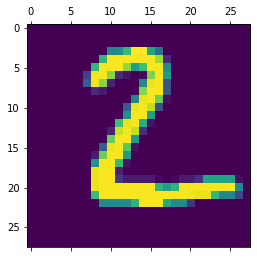

In [23]:
plt.matshow(X_test[1])

In [24]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

array([4.6033564e-01, 5.5884719e-03, 9.9917614e-01, 3.4362215e-01,
       3.9284795e-10, 7.4840409e-01, 8.6553413e-01, 6.1657206e-13,
       1.2593177e-01, 2.6456097e-09], dtype=float32)

In [25]:
np.argmax(y_predicted[1])

2

In [26]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [27]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [28]:
model.predict(X_test_flattened)

array([[2.6292533e-02, 2.2482267e-07, 5.2129477e-02, ..., 9.9969351e-01,
        6.2571883e-02, 5.9062600e-01],
       [4.6033564e-01, 5.5884719e-03, 9.9917614e-01, ..., 6.1657206e-13,
        1.2593177e-01, 2.6456097e-09],
       [6.5013766e-04, 9.9364084e-01, 6.5677500e-01, ..., 1.2500575e-01,
        3.7077168e-01, 4.8098952e-02],
       ...,
       [5.9532103e-06, 3.2302717e-06, 1.0097623e-03, ..., 2.2827849e-01,
        4.4035915e-01, 7.5615311e-01],
       [1.8006563e-04, 1.2865663e-04, 1.5047193e-04, ..., 3.4361889e-05,
        6.4145303e-01, 5.9448619e-05],
       [7.2828233e-03, 2.2107625e-10, 1.2920314e-01, ..., 1.1554622e-08,
        1.6438961e-04, 2.6419818e-07]], dtype=float32)

In [29]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    5,    3,    2,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   8,   10,  923,   19,    8,    4,   12,    9,   35,    4],
       [   4,    0,   18,  928,    0,   19,    3,   11,   19,    8],
       [   2,    1,    5,    2,  911,    0,    9,    4,   10,   38],
       [  11,    3,    3,   39,    7,  776,   13,    6,   28,    6],
       [  13,    3,    7,    1,    7,   13,  911,    2,    1,    0],
       [   1,    5,   23,    7,    6,    1,    0,  955,    2,   28],
       [  11,    9,    7,   25,    9,   25,    8,   12,  862,    6],
       [  11,    7,    1,   11,   23,    8,    0,   22,    4,  922]])>

Text(69.0, 0.5, 'Truth')

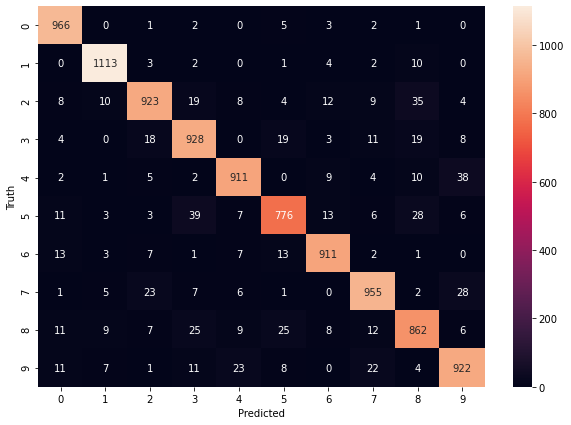

In [30]:
#this is just used for some fancy colourful observation
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
#adding hidden layer

In [32]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 930us/step - loss: 0.2775 - accuracy: 0.9216
Epoch 2/5
1875/1875 [==============================] - 2s 995us/step - loss: 0.1249 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0875 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 2s 920us/step - loss: 0.0654 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 2s 924us/step - loss: 0.0508 - accuracy: 0.9845


In [33]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 615us/step - loss: 0.0751 - accuracy: 0.9758


[0.07507734000682831, 0.9757999777793884]

Text(69.0, 0.5, 'Truth')

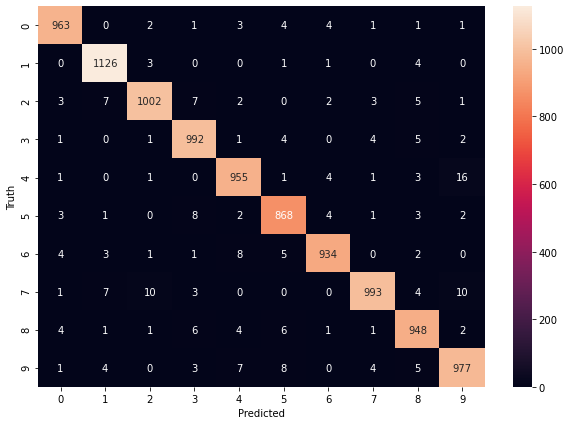

In [34]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)


plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 889us/step - loss: 0.2791 - accuracy: 0.9196
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1226 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 2s 982us/step - loss: 0.0860 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0658 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0524 - accuracy: 0.9843


In [36]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/SGD",histogram_freq=1)

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6644 - accuracy: 0.8350
Epoch 2/5
1875/1875 [==============================] - 2s 970us/step - loss: 0.3405 - accuracy: 0.9052
Epoch 3/5
1875/1875 [==============================] - 2s 838us/step - loss: 0.2905 - accuracy: 0.9183
Epoch 4/5
1875/1875 [==============================] - 2s 840us/step - loss: 0.2594 - accuracy: 0.9276
Epoch 5/5
1875/1875 [==============================] - 2s 847us/step - loss: 0.2364 - accuracy: 0.9334


In [37]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

In [38]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/adam",histogram_freq=1)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2719 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 2s 966us/step - loss: 0.1230 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 2s 945us/step - loss: 0.0877 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 2s 955us/step - loss: 0.0667 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0527 - accuracy: 0.9834
